In [27]:
import pandas as pd
from sklearn.metrics.cluster import completeness_score, homogeneity_score, v_measure_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dbscan = pd.read_excel('../dataset/db++.xlsx')

In [6]:
cs = completeness_score(dbscan['Label_1'], dbscan['Cluster 1'])
hs = homogeneity_score(dbscan['Label_1'], dbscan['Cluster 1'])
vs = v_measure_score(dbscan['Label_1'], dbscan['Cluster 1'])
print("DBSCAN, 3273 clusters")
print("Completeness    |    Homogeneity    |    V Measure")
print(cs, hs, vs)
cs = completeness_score(dbscan['Label_2'], dbscan['Cluster 2'])
hs = homogeneity_score(dbscan['Label_2'], dbscan['Cluster 2'])
vs = v_measure_score(dbscan['Label_2'], dbscan['Cluster 2'])
print("DBSCAN, 1564 clusters")
print("Completeness    |    Homogeneity    |    V Measure")
print(cs, hs, vs)

DBSCAN, 3273 clusters
Completeness | Homogeneity | V Measure
0.9694526963458389 0.9488324680009982 0.9590317556328978
DBSCAN, 1564 clusters
Completeness | Homogeneity | V Measure
0.9722368770038069 0.7652370455316776 0.8564061487951841


In [7]:
kmeans = pd.read_excel('../dataset/kmeans++.xlsx')

In [10]:
cs = completeness_score(kmeans['Label_1'], kmeans['Cluster 1'])
hs = homogeneity_score(kmeans['Label_1'], kmeans['Cluster 1'])
vs = v_measure_score(kmeans['Label_1'], kmeans['Cluster 1'])
print("K-means, 3273 clusters")
print("Completeness    |    Homogeneity    |    V Measure")
print(cs, hs, vs)
cs = completeness_score(kmeans['Label_2'], kmeans['Cluster 2'])
hs = homogeneity_score(kmeans['Label_2'], kmeans['Cluster 2'])
vs = v_measure_score(kmeans['Label_2'], kmeans['Cluster 2'])
print("K-means, 1564 clusters")
print("Completeness    |    Homogeneity    |    V Measure")
print(cs, hs, vs)

K-means, 3273 clusters
Completeness    |    Homogeneity    |    V Measure
0.9661644416995355 0.972430287625264 0.9692872385580183
K-means, 1564 clusters
Completeness    |    Homogeneity    |    V Measure
0.8848871974170907 0.9700588188513736 0.9255176398825086


In [15]:
hie = pd.read_excel('../dataset/hierarch++.xlsx')

In [16]:
cs = completeness_score(hie['Label_1'], hie['Cluster 1'])
hs = homogeneity_score(hie['Label_1'], hie['Cluster 1'])
vs = v_measure_score(hie['Label_1'], hie['Cluster 1'])
print("Hierarchical, 3273 clusters")
print("Completeness    |    Homogeneity    |    V Measure")
print(cs, hs, vs)
cs = completeness_score(hie['Label_2'], hie['Cluster 2'])
hs = homogeneity_score(hie['Label_2'], hie['Cluster 2'])
vs = v_measure_score(hie['Label_2'], hie['Cluster 2'])
print("Hierarchical, 1564 clusters")
print("Completeness    |    Homogeneity    |    V Measure")
print(cs, hs, vs)

Hierarchical, 3273 clusters
Completeness    |    Homogeneity    |    V Measure
0.9659841447672199 0.9729644504893822 0.9694617329145964
Hierarchical, 1564 clusters
Completeness    |    Homogeneity    |    V Measure
0.8821858216142575 0.9759387111787617 0.9266970846913626


In [31]:
ae = pd.read_excel('../dataset/autoencoder++.xlsx')

In [32]:
cs = completeness_score(ae['Label_1'], ae['Cluster 1'])
hs = homogeneity_score(ae['Label_1'], ae['Cluster 1'])
vs = v_measure_score(ae['Label_1'], ae['Cluster 1'])
print("Autoencoder, 3273 clusters")
print("Completeness    |    Homogeneity    |    V Measure")
print(cs, hs, vs)
cs = completeness_score(ae['Label_2'], ae['Cluster 2'])
hs = homogeneity_score(ae['Label_2'], ae['Cluster 2'])
vs = v_measure_score(ae['Label_2'], ae['Cluster 2'])
print("Autoencoder, 1564 clusters")
print("Completeness    |    Homogeneity    |    V Measure")
print(cs, hs, vs)

Autoencoder, 3273 clusters
Completeness    |    Homogeneity    |    V Measure
0.9488193030965955 0.9481766973732474 0.9484978913938601
Autoencoder, 1564 clusters
Completeness    |    Homogeneity    |    V Measure
0.8024790965106041 0.8481102481929353 0.8246639273361978


In [33]:
dates = ae.groupby(['DATA'])['decoded_txt'].mean().reset_index(name ='Mean')
dates = dates.sort_values(by=['DATA'])
muni = ae.copy()
muni.loc[(muni['MUNICIPIO'] != 'JOAO PESSOA'), 'decoded_txt'] = 0
# muni.loc[(muni['MUNICIPIO'] != 'CAMPINA GRANDE'), 'decoded_txt'] = 0
muni = muni.groupby(['DATA'])['decoded_txt'].mean().reset_index(name ='Mean')
muni = muni.sort_values(by=['DATA'])

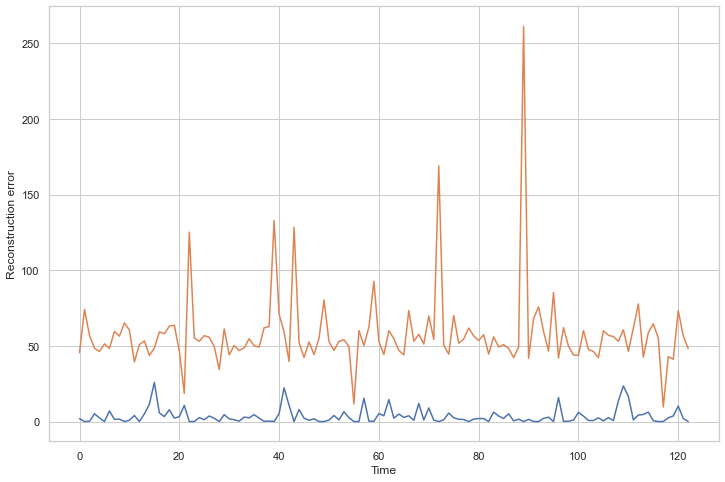

In [34]:
plt.figure(figsize=(12,8))
plt.plot(muni['Mean'])
plt.plot(dates['Mean'])
plt.xlabel("Time")
plt.ylabel("Reconstruction error")
plt.show()

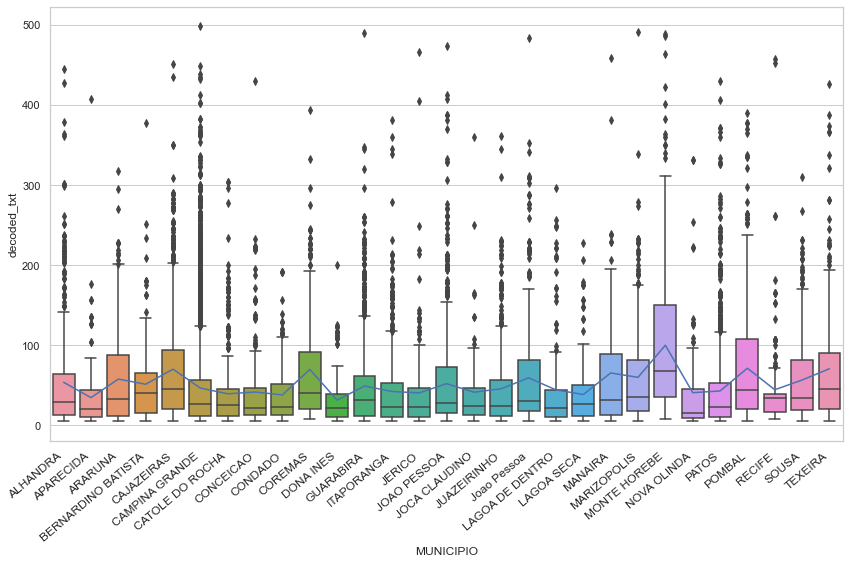

In [35]:
munis_aux = ae.groupby('MUNICIPIO')['decoded_txt'].count().reset_index(name ='Total')
munis_aux = munis_aux[munis_aux['Total'] > 100]
munis = ae[['MUNICIPIO', 'decoded_txt']]
munis = munis[munis['MUNICIPIO'].isin(munis_aux['MUNICIPIO'])]
munis = munis.sort_values(by=['MUNICIPIO']).reset_index(drop=True)
munis2 = ae.groupby('MUNICIPIO')['decoded_txt'].mean().reset_index(name ='Mean')
munis2 = munis2[munis2['MUNICIPIO'].isin(munis_aux['MUNICIPIO'])]
munis2 = munis2.sort_values(by=['MUNICIPIO']).reset_index(drop=True)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8)) 
boxplot = sns.boxplot(x='MUNICIPIO', y='decoded_txt', data = munis)
barplot = sns.lineplot(x='MUNICIPIO', y='Mean', data = munis2)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

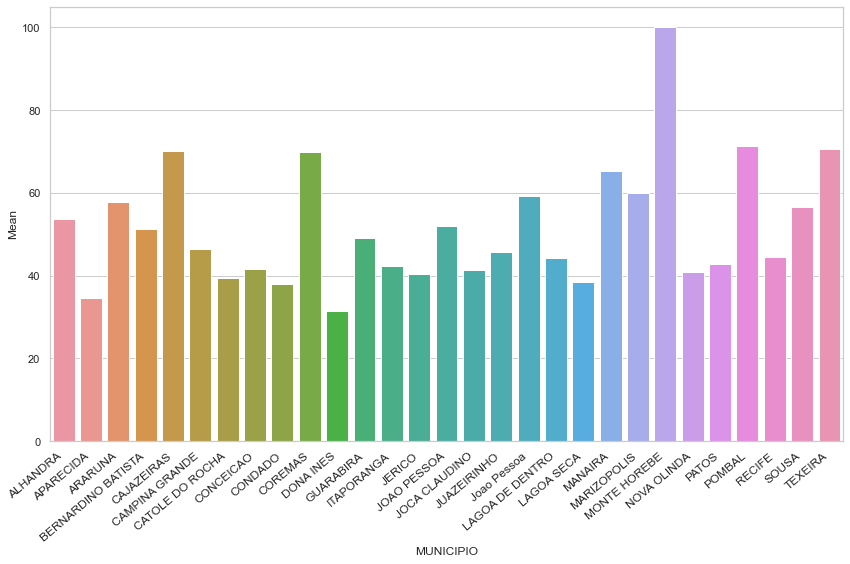

In [36]:
munis_aux = ae.groupby('MUNICIPIO')['decoded_txt'].count().reset_index(name ='Total')
munis_aux = munis_aux[munis_aux['Total'] > 100]
munis2 = ae.groupby('MUNICIPIO')['decoded_txt'].mean().reset_index(name ='Mean')
munis2 = munis2[munis2['MUNICIPIO'].isin(munis_aux['MUNICIPIO'])]
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8)) 
barplot = sns.barplot(x='MUNICIPIO', y='Mean', data = munis2)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plt.tight_layout()
plt.show()